## /collections/{collection_id}/processes/area:retrieve


In [1]:
import xarray as xr
import requests
from IPython.display import GeoJSON
from shapely.geometry import mapping, box 
import numpy as np

In [2]:
dapa_endpoint = 'http://0.0.0.0:8000'

### Get the DAPA collections

In [3]:
query = '{}/collections'.format(dapa_endpoint)

In [4]:
r = requests.get(query)

In [5]:
r.status_code

200

In [6]:
r.json()

{'collections': [{'id': 'S5P-NO2',
   'title': 'Sentinel-5P NO2 column number density over Europe',
   'extent': {'spatial': {'bbox': [[-13, 57, 33, 33]], 'crs': 'EPSG:4326'},
    'temporal': {'interval': [['2018-05-01T00:00:00/2020-04-01T00:00:00']]}}}]}

In [7]:
collection_bbox = r.json()['collections'][0]['extent']['spatial']['bbox']

In [8]:
collection_bbox

[[-13, 57, 33, 33]]

In [9]:
GeoJSON([{'type': 'Feature', 
          'properties': {},
          'geometry': mapping(box(*collection_bbox[0]))}])

<IPython.display.GeoJSON object>

In [10]:
collection = r.json()['collections'][0]['id']

collection

'S5P-NO2'

### Get the collection variables

In [11]:
query = '{}/collections/{}/variables'.format(dapa_endpoint, collection)

In [12]:
r = requests.get(query)

In [13]:
r.status_code

200

In [14]:
variables = r.json()

variables

{'variables': [{'id': 'tropospheric_NO2_column_number_density',
   'title': 'Troposheric NO2 column number density',
   'uom': 'umol/m2'}]}

In [15]:
variable = variables['variables'][0]['id']

variable

'tropospheric_NO2_column_number_density'

### /collections/{collection_id}/processes/area:retrieve

In [16]:
bbox = [2.12, 48.75, 2.52, 48.99]

In [17]:
GeoJSON([{'type': 'Feature', 
          'properties': {},
          'geometry': mapping(box(*bbox))}])

<IPython.display.GeoJSON object>

In [18]:
query = '{}/collections/{}/processes/area:retrieve'.format(dapa_endpoint,
                                                                  collection)

query

'http://0.0.0.0:8000/collections/S5P-NO2/processes/area:retrieve'

In [20]:
params = {'bbox': '{},{},{},{}'.format(*bbox),
          'variable': variable}

Submit the request:

In [21]:
r = requests.get(query, params=params)

Get the HTTP exit code:

In [22]:
r.status_code

200

Print the response

In [23]:
r.json()

{'dims': ['date', 'y', 'x'],
 'attrs': {'transform': [0.02197265625,
   0.0,
   -13.0078125,
   0.0,
   -0.02197265625,
   57.01904296875],
  'crs': '+init=epsg:4326',
  'res': [0.02197265625, 0.02197265625],
  'is_tiled': 0,
  'nodatavals': [9.969209968386869e+36],
  'scales': [1.0],
  'offsets': [0.0],
  'AREA_OR_POINT': 'Area',
  'latitude#units': 'degree_north',
  'longitude#units': 'degree_east',
  'NC_GLOBAL#Conventions': 'HARP-1.0',
  'NC_GLOBAL#datetime_start': '6695.090290335648',
  'NC_GLOBAL#datetime_stop': '6725.99574832176',
  'NC_GLOBAL#history': "2020-05-07T18:08:44Z [harp-1.10] harpmerge -a 'tropospheric_NO2_column_number_density_validity>75;keep(tropospheric_NO2_column_number_density, latitude, latitude_bounds, longitude, longitude_bounds, datetime_start, datetime_length);derive(datetime_stop {time} [days since 2000-01-01]);derive(datetime_start [days since 2000-01-01]);exclude(datetime_length);bin_spatial(8193, -90, 0.02197265625, 16385, -180, 0.02197265625);derive(la

In [24]:
xr.DataArray.from_dict(r.json())

<xarray.DataArray 'tropospheric_NO2_column_number_density' (date: 24, y: 11, x: 19)>
array([[[ 59.88809204,  61.32176208,  61.30334854, ...,  90.21883392,
          91.45083618,  91.38700867],
        [ 63.66669083,  66.86782837,  65.80124664, ...,  92.21884155,
          93.78935242,  91.57817841],
        [ 67.23914337,  71.30778503,  71.35341644, ...,  92.75211334,
          93.91197205,  92.97080231],
        ...,
        [ 77.0526123 ,  77.45927429,  81.24707031, ...,  97.76509094,
          95.73951721,  86.93675232],
        [ 76.00627899,  79.65251923,  83.03959656, ...,  97.36641693,
          93.87401581,  85.31800079],
        [ 74.97103119,  81.26727295,  84.86564636, ...,  96.03520203,
          92.40023804,  85.24414062]],

       [[ 55.92516708,  57.07376862,  53.36788177, ...,  82.00536346,
          82.43547821,  81.18595123],
        [ 56.33364105,  58.81343079,  57.81508636, ...,  88.50658417,
          90.62962341,  87.44437408],
        [ 59.43800354,  66.33312225,  67.34671021, ...,  88.30265045,
          88.18644714,  84.38611603],
        ...,
        [ 90.49092865,  96.52840424,  93.19681549, ...,  88.65896606,
          84.46470642,  80.2696228 ],
        [ 84.86980438,  90.90667725,  92.77139282, ...,  90.50688934,
          80.64710236,  74.20735168],
        [ 84.61336517,  87.6968689 ,  91.07660675, ...,  91.81159973,
          78.22963715,  70.30015564]],

       [[ 52.21287537,  52.51491165,  52.13228989, ..., 125.70884705,
         122.44098663, 122.77231598],
        [ 57.19766617,  60.50236511,  69.67517853, ..., 127.57549286,
         123.19435883, 112.38091278],
        [ 81.67734528,  90.22076416,  95.34268188, ..., 105.59619141,
          96.38639069,  93.12185669],
        ...,
        [ 87.4633255 ,  93.85528564,  95.76469421, ...,  81.66950989,
          76.83361053,  74.21087646],
        [ 98.21123505, 100.835289  ,  96.70760345, ...,  82.61978149,
          81.18718719,  81.426651  ],
        [ 95.86763   , 106.28158569, 103.88134766, ...,  76.59187317,
          78.21000671,  79.05394745]],

       ...,

       [[ 67.18969727,  71.82580566,  75.54975128, ...,  60.56386948,
          52.346138  ,  53.24533844],
        [ 75.29432678,  76.43717957,  81.59134674, ...,  62.85451508,
          59.17993546,  52.28413773],
        [ 80.81064606,  84.51331329,  89.57750702, ...,  64.92754364,
          63.74916077,  58.62598419],
        ...,
        [ 69.3260498 ,  67.04579926,  61.30590057, ...,  61.95343781,
          56.9467392 ,  56.39172745],
        [ 67.32944489,  48.69992828,  50.7051506 , ...,  58.74651718,
          56.38559341,  54.5785141 ],
        [ 70.79550934,  67.60171509,  57.59955978, ...,  60.68038177,
          52.38071823,  47.71034241]],

       [[ 61.60929108,  63.7349205 ,  67.5039978 , ...,  66.54492188,
          62.26766586,  62.05936432],
        [ 67.15235901,  69.78642273,  71.02888489, ...,  62.60667801,
          60.73852921,  59.64277649],
        [ 78.38118744,  78.79299164,  77.05662537, ...,  64.05916595,
          61.66062164,  60.66954803],
        ...,
        [ 68.07269287,  68.39390564,  71.60294342, ...,  66.92690277,
          66.44882202,  66.04083252],
        [ 67.01002502,  67.73400879,  69.66661835, ...,  67.76413727,
          65.67166138,  64.26833344],
        [ 67.12130737,  67.21585083,  67.24251556, ...,  72.22547913,
          67.21703339,  63.95976257]],

       [[ 56.10283279,  56.06592941,  56.18835449, ...,  53.16399002,
          52.17932129,  49.09886169],
        [ 59.14011383,  58.50629807,  57.52029037, ...,  53.87491989,
          51.41941833,  50.49642181],
        [ 61.63633728,  62.88811874,  61.2239151 , ...,  54.2862854 ,
          51.91410446,  50.14110565],
        ...,
        [ 65.21341705,  65.9050293 ,  69.30789185, ...,  59.74123383,
          59.29148483,  56.43355179],
        [ 64.69109344,  65.25482178,  68.61230469, ...,  59.73298645,
          56.52391815,  54.06163406],
        [ 62.1942215 ,  62.1482620

In [25]:
area_retrieved = xr.DataArray.from_dict(r.json()).assign_coords(date=[np.datetime64(d) for d in xr.DataArray.from_dict(r.json())['date'].values])

In [26]:
area_retrieved

<xarray.DataArray 'tropospheric_NO2_column_number_density' (date: 24, y: 11, x: 19)>
array([[[ 59.88809204,  61.32176208,  61.30334854, ...,  90.21883392,
          91.45083618,  91.38700867],
        [ 63.66669083,  66.86782837,  65.80124664, ...,  92.21884155,
          93.78935242,  91.57817841],
        [ 67.23914337,  71.30778503,  71.35341644, ...,  92.75211334,
          93.91197205,  92.97080231],
        ...,
        [ 77.0526123 ,  77.45927429,  81.24707031, ...,  97.76509094,
          95.73951721,  86.93675232],
        [ 76.00627899,  79.65251923,  83.03959656, ...,  97.36641693,
          93.87401581,  85.31800079],
        [ 74.97103119,  81.26727295,  84.86564636, ...,  96.03520203,
          92.40023804,  85.24414062]],

       [[ 55.92516708,  57.07376862,  53.36788177, ...,  82.00536346,
          82.43547821,  81.18595123],
        [ 56.33364105,  58.81343079,  57.81508636, ...,  88.50658417,
          90.62962341,  87.44437408],
        [ 59.43800354,  66.33312225,  67.34671021, ...,  88.30265045,
          88.18644714,  84.38611603],
        ...,
        [ 90.49092865,  96.52840424,  93.19681549, ...,  88.65896606,
          84.46470642,  80.2696228 ],
        [ 84.86980438,  90.90667725,  92.77139282, ...,  90.50688934,
          80.64710236,  74.20735168],
        [ 84.61336517,  87.6968689 ,  91.07660675, ...,  91.81159973,
          78.22963715,  70.30015564]],

       [[ 52.21287537,  52.51491165,  52.13228989, ..., 125.70884705,
         122.44098663, 122.77231598],
        [ 57.19766617,  60.50236511,  69.67517853, ..., 127.57549286,
         123.19435883, 112.38091278],
        [ 81.67734528,  90.22076416,  95.34268188, ..., 105.59619141,
          96.38639069,  93.12185669],
        ...,
        [ 87.4633255 ,  93.85528564,  95.76469421, ...,  81.66950989,
          76.83361053,  74.21087646],
        [ 98.21123505, 100.835289  ,  96.70760345, ...,  82.61978149,
          81.18718719,  81.426651  ],
        [ 95.86763   , 106.28158569, 103.88134766, ...,  76.59187317,
          78.21000671,  79.05394745]],

       ...,

       [[ 67.18969727,  71.82580566,  75.54975128, ...,  60.56386948,
          52.346138  ,  53.24533844],
        [ 75.29432678,  76.43717957,  81.59134674, ...,  62.85451508,
          59.17993546,  52.28413773],
        [ 80.81064606,  84.51331329,  89.57750702, ...,  64.92754364,
          63.74916077,  58.62598419],
        ...,
        [ 69.3260498 ,  67.04579926,  61.30590057, ...,  61.95343781,
          56.9467392 ,  56.39172745],
        [ 67.32944489,  48.69992828,  50.7051506 , ...,  58.74651718,
          56.38559341,  54.5785141 ],
        [ 70.79550934,  67.60171509,  57.59955978, ...,  60.68038177,
          52.38071823,  47.71034241]],

       [[ 61.60929108,  63.7349205 ,  67.5039978 , ...,  66.54492188,
          62.26766586,  62.05936432],
        [ 67.15235901,  69.78642273,  71.02888489, ...,  62.60667801,
          60.73852921,  59.64277649],
        [ 78.38118744,  78.79299164,  77.05662537, ...,  64.05916595,
          61.66062164,  60.66954803],
        ...,
        [ 68.07269287,  68.39390564,  71.60294342, ...,  66.92690277,
          66.44882202,  66.04083252],
        [ 67.01002502,  67.73400879,  69.66661835, ...,  67.76413727,
          65.67166138,  64.26833344],
        [ 67.12130737,  67.21585083,  67.24251556, ...,  72.22547913,
          67.21703339,  63.95976257]],

       [[ 56.10283279,  56.06592941,  56.18835449, ...,  53.16399002,
          52.17932129,  49.09886169],
        [ 59.14011383,  58.50629807,  57.52029037, ...,  53.87491989,
          51.41941833,  50.49642181],
        [ 61.63633728,  62.88811874,  61.2239151 , ...,  54.2862854 ,
          51.91410446,  50.14110565],
        ...,
        [ 65.21341705,  65.9050293 ,  69.30789185, ...,  59.74123383,
          59.29148483,  56.43355179],
        [ 64.69109344,  65.25482178,  68.61230469, ...,  59.73298645,
          56.52391815,  54.06163406],
        [ 62.1942215 ,  62.1482620

In [27]:
area_retrieved.values

array([[[ 59.88809204,  61.32176208,  61.30334854, ...,  90.21883392,
          91.45083618,  91.38700867],
        [ 63.66669083,  66.86782837,  65.80124664, ...,  92.21884155,
          93.78935242,  91.57817841],
        [ 67.23914337,  71.30778503,  71.35341644, ...,  92.75211334,
          93.91197205,  92.97080231],
        ...,
        [ 77.0526123 ,  77.45927429,  81.24707031, ...,  97.76509094,
          95.73951721,  86.93675232],
        [ 76.00627899,  79.65251923,  83.03959656, ...,  97.36641693,
          93.87401581,  85.31800079],
        [ 74.97103119,  81.26727295,  84.86564636, ...,  96.03520203,
          92.40023804,  85.24414062]],

       [[ 55.92516708,  57.07376862,  53.36788177, ...,  82.00536346,
          82.43547821,  81.18595123],
        [ 56.33364105,  58.81343079,  57.81508636, ...,  88.50658417,
          90.62962341,  87.44437408],
        [ 59.43800354,  66.33312225,  67.34671021, ...,  88.30265045,
          88.18644714,  84.38611603],
        ...,


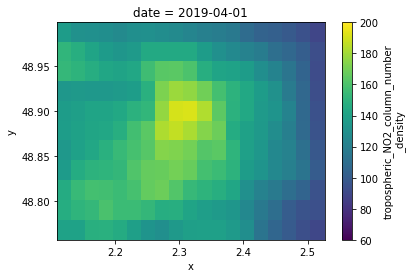

In [29]:
area_retrieved.sel(date='2019-04-01T00:00:00').plot(vmin=60, vmax=200)

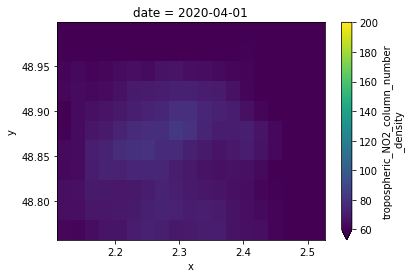

In [30]:
area_retrieved.sel(date='2020-04-01T00:00:00').plot(vmin=60, vmax=200)